#  **Final Project - Demographic Analysis of the Academy Award Nominations**
*Notebook I*

The Oscar Award dataset - Explanatory Data Analysis

---

> Authors: Sara Kartalovic, Bogdan Milovanovic,  Tarja Savonen<br>
> Date: 19/01/2022 <br>
> Course : Network Science <br>
> Teacher : Tomaso Erseghe <br>
> Co-Teachers : Lejla Dzanko

In [ ]:
# Imports

import os
import pandas as pd
import numpy as np
import math as math

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 

In [ ]:
# Mount Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [ ]:
oscar = pd.read_csv('/content/drive/MyDrive/NS/Original Filtered Data/the_oscar_award.csv')

In [ ]:
oscar = oscar.dropna()

In [ ]:
#Data cleaning

oscar['year_ceremony'] = oscar['year_ceremony'].astype(int)

oscar['category']=oscar['category'].apply(lambda x:x.strip())
oscar['name']=oscar['name'].apply(lambda x:x.strip().replace("(","").replace(")",""))
oscar['film']=oscar['film'].apply(lambda x: np.NaN if str(x)=='nan' else str(x).strip())

oscar['category']=oscar['category'].apply(lambda x:x.capitalize())

category=oscar['category'].str.split('(',n=1,expand=True)
category.columns=['category1','category2']
category['category2']=category['category2'].apply(lambda x:str(x).capitalize().replace(")",""))
oscar=pd.concat([oscar,category],axis=1)

nameRole=oscar['name'].str.split(',',expand=True)
nameRole=nameRole.rename(columns={0:'one_of_the_names'})
nameRole['one_of_the_names']=nameRole['one_of_the_names'].apply(lambda x: x if x.find(":")< 0 else x[x.index(':')+1:] )

oscar=pd.concat([oscar,nameRole['one_of_the_names']],axis=1)

In [ ]:
print(oscar.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10091 entries, 0 to 10390
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year_film         10091 non-null  int64 
 1   year_ceremony     10091 non-null  int64 
 2   ceremony          10091 non-null  int64 
 3   category          10091 non-null  object
 4   name              10091 non-null  object
 5   film              10091 non-null  object
 6   winner            10091 non-null  bool  
 7   category1         10091 non-null  object
 8   category2         10091 non-null  object
 9   one_of_the_names  10091 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 798.2+ KB
None


# Explanatory Data Analysis (EDA)

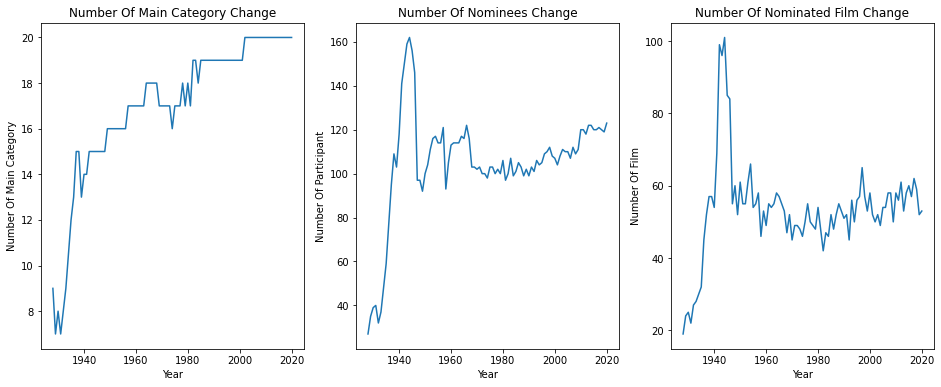

In [ ]:
#Change from year to year
year_record=oscar[['year_ceremony','category1','name','film']].groupby(by='year_ceremony').nunique()
year_record['true_winner']=oscar.loc[oscar.winner==1,['year_ceremony','winner']].groupby(by='year_ceremony').count()
year_record['false_winner']=oscar.loc[oscar.winner==0,['year_ceremony','winner']].groupby(by='year_ceremony').count()


#print(year_record.describe().round(4))

f, axes = plt.subplots(1,3, figsize=(16,6))
year_number=year_record.index.tolist()
yCategory=year_record['category1'].tolist()
yName=year_record['name'].tolist()
yFilm=year_record['film'].tolist()
vis1 = sns.lineplot(x=year_number, y=yCategory,ax=axes[0])
vis1.set(xlabel='Year', ylabel='Number Of Main Category')
axes[0].set_title('Number Of Main Category Change')
vis2 = sns.lineplot(x=year_number, y=yName,ax=axes[1])
vis2.set(xlabel='Year', ylabel='Number Of Participant')
axes[1].set_title('Number Of Nominees Change')
vis3 = sns.lineplot(x=year_number, y=yFilm,ax=axes[2])
vis3.set(xlabel='Year', ylabel='Number Of Film')
axes[2].set_title('Number Of Nominated Film Change')
plt.show()

In [ ]:
#description
year_record['nominate']=oscar[['year_ceremony','winner']].groupby(by='year_ceremony').count()

yearDescr=round(year_record.describe(),4)
print(yearDescr)

       category1      name      film  true_winner  false_winner  nominate
count    92.0000   92.0000   92.0000      92.0000       92.0000   92.0000
mean     17.0326  105.4239   53.6304      22.5978       87.0870  109.6848
std       3.0829   23.9088   13.1715       3.9225       23.2458   26.0156
min       7.0000   27.0000   19.0000       7.0000       17.0000   29.0000
25%      16.0000  100.0000   49.0000      23.0000       80.7500  103.0000
50%      17.5000  107.0000   53.5000      24.0000       85.5000  109.0000
75%      19.0000  116.0000   57.0000      24.0000       96.0000  121.0000
max      20.0000  162.0000  101.0000      27.0000      156.0000  182.0000


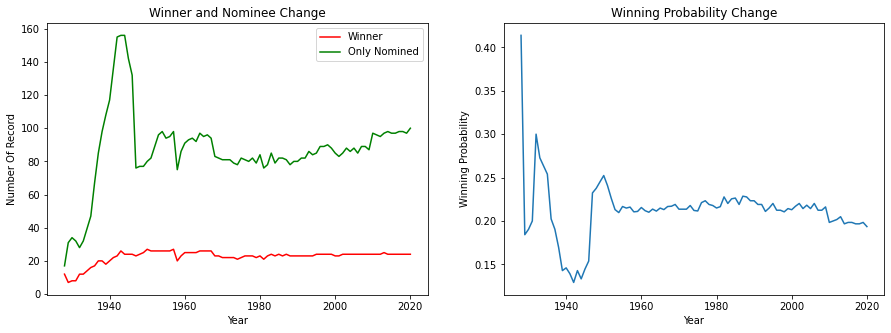

In [ ]:
#Change in award-winning rate per year
figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
true_winner_line,false_winner_line=plt.plot(
    year_number,year_record['true_winner'].to_list(),
    year_number,year_record['false_winner'].to_list())


plt.setp(true_winner_line,color='r')
plt.setp(false_winner_line,color='g')
plt.ylabel('Number Of Record')
plt.xlabel('Year')
plt.title('Winner and Nominee Change')

plt.legend(handles = [true_winner_line,false_winner_line], labels = ['Winner', 'Only Nomined'], loc = 'best')


year_record['winning_probability']=year_record['true_winner']/year_record['nominate']
yWinning_probability=year_record['winning_probability'].to_list()
vis1 = sns.lineplot(x=year_number, y=yWinning_probability,ax=plt.subplot(1,2,2))
vis1.set(xlabel='Year', ylabel='Winning Probability')
vis1.set_title('Winning Probability Change')

plt.show()

In [ ]:
#Film information
All_movie=oscar[['film','winner']].groupby(by='film').sum().sort_values(by='winner',ascending=False)
All_movie['Awards']=All_movie['winner'].apply(lambda x:int(x))
del All_movie['winner']
All_movie['Nominations']=oscar[['film','winner']].groupby(by='film').count()
All_movie['Winnin_rate']=All_movie['Awards']/All_movie['Nominations']

print(All_movie.head(10))

                                               Awards  Nominations  Winnin_rate
film                                                                           
Titanic                                            12           16     0.750000
The Lord of the Rings: The Return of the King      11           11     1.000000
Ben-Hur                                            11           12     0.916667
West Side Story                                    10           11     0.909091
The English Patient                                 9           12     0.750000
Gigi                                                9            9     1.000000
The Last Emperor                                    9            9     1.000000
Slumdog Millionaire                                 8           10     0.800000
On the Waterfront                                   8           12     0.666667
My Fair Lady                                        8           12     0.666667


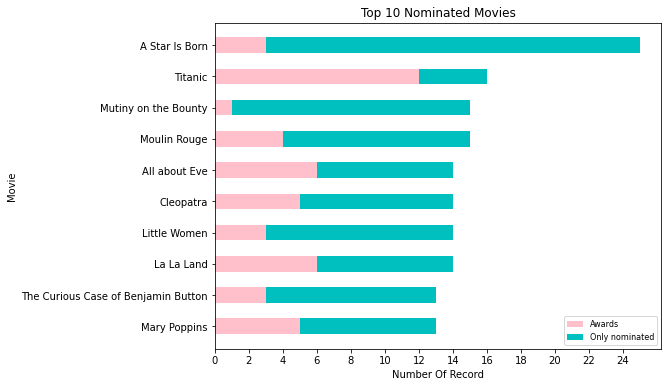

In [ ]:
#Top 10 Nominated Movies
figure(figsize=(8, 6))

nominated_movie=All_movie.sort_values(by='Nominations',ascending=False).head(10)
nominated_movie['Diff']=nominated_movie['Nominations']-nominated_movie['Awards']
nominated_movie=nominated_movie.sort_values(by='Nominations')
vis1=plt.barh(nominated_movie.index.tolist(), nominated_movie['Awards'], 0.5,color = 'pink', label = 'Awards')
vis1=plt.barh(nominated_movie.index.tolist(), nominated_movie['Diff'],0.5, color = 'c', left = nominated_movie['Awards'], label = 'Only nominated')

plt.xlabel('Number Of Record')
plt.ylabel('Movie')

plt.xticks(range(0,max(nominated_movie['Nominations']),2))
plt.legend(loc='lower right',fontsize=8)
plt.title('Top 10 Nominated Movies')

plt.show()

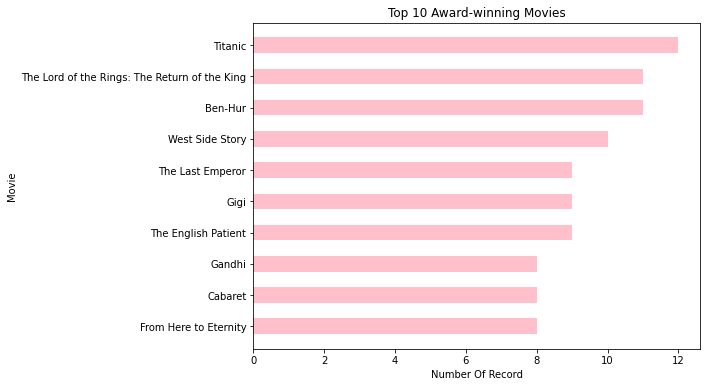

In [ ]:
#Top 10 Award-winning Movies
figure(figsize=(8, 6))

Award_winning_movie=All_movie.sort_values(by='Awards',ascending=False).head(10)
Award_winning_movie=Award_winning_movie.sort_values(by='Awards')
movie_name=Award_winning_movie.index.tolist()

count_award=Award_winning_movie['Awards'].to_list()


vis2= plt.barh(movie_name,count_award,height=0.5, color = 'pink')
plt.xlabel('Number Of Record')
plt.ylabel('Movie')
plt.title('Top 10 Award-winning Movies')
plt.xticks(range(0,max(Award_winning_movie['Awards'])+2,2))
plt.show()

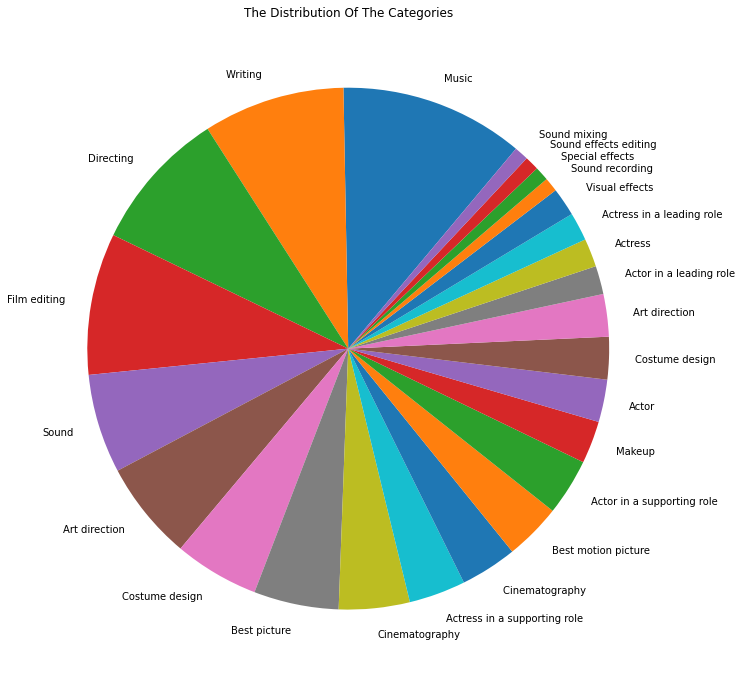

In [ ]:
#Categories Distribution
topTenMovieInfo=oscar.loc[oscar['film'].isin(movie_name),['year_ceremony','year_film','name','film','category1']]

figure(figsize=(12, 12))

plt.pie(topTenMovieInfo.category1.value_counts(),labels=topTenMovieInfo.category1.value_counts().index,
        shadow=False,startangle=50)

plt.title('The Distribution Of The Categories')

plt.show()

In [ ]:
#winner infomation
nominated_person=oscar['one_of_the_names'].value_counts()
nominated_person=pd.DataFrame(nominated_person)

nominated_person['Awards']=oscar.loc[oscar.winner==1,['one_of_the_names','winner']].groupby(by='one_of_the_names').count()

print(nominated_person.head(10))

                     one_of_the_names  Awards
Metro-Goldwyn-Mayer                64    12.0
Walt Disney                        59    22.0
John Williams                      44     4.0
Warner Bros.                       43     7.0
Alfred Newman                      41     9.0
France                             37     9.0
Edith Head                         34     8.0
  Cedric Gibbons                   28     8.0
Italy                              27    10.0
Paramount                          25     5.0


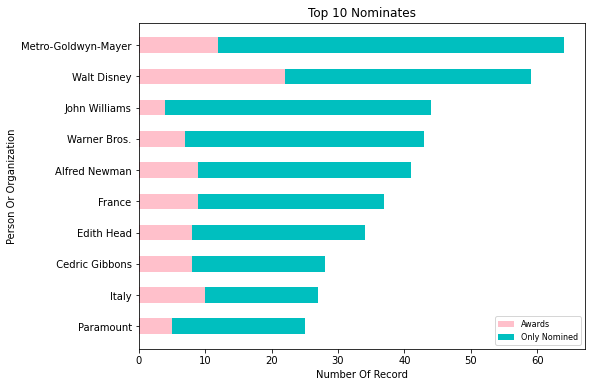

In [ ]:
#Top 10 Nominates
figure(figsize=(8, 6))

topTenPerson=nominated_person.head(10)
topTenPerson=pd.DataFrame(topTenPerson)
topTenPerson=topTenPerson.sort_values(by='one_of_the_names')

topTenPerson=topTenPerson.rename(columns={'one_of_the_names':'Total nominations'})

topTenPerson['Awards']=oscar.loc[oscar.winner==1,['one_of_the_names','winner']].groupby(by='one_of_the_names').count()
topTenPerson['Only Nomined']=topTenPerson['Total nominations']-topTenPerson['Awards']

vis1= plt.barh(topTenPerson.index.tolist(),topTenPerson['Awards'].to_list(),height=0.5, color = 'pink',label='Awards')
vis1= plt.barh(topTenPerson.index.tolist(),topTenPerson['Only Nomined'].to_list(),height=0.5, left=topTenPerson['Awards'].to_list(),color = 'c',label='Only Nomined')
plt.xlabel('Number Of Record')
plt.ylabel('Person Or Organization')
plt.title('Top 10 Nominates')
plt.legend(loc='lower right',fontsize=8)

plt.show()

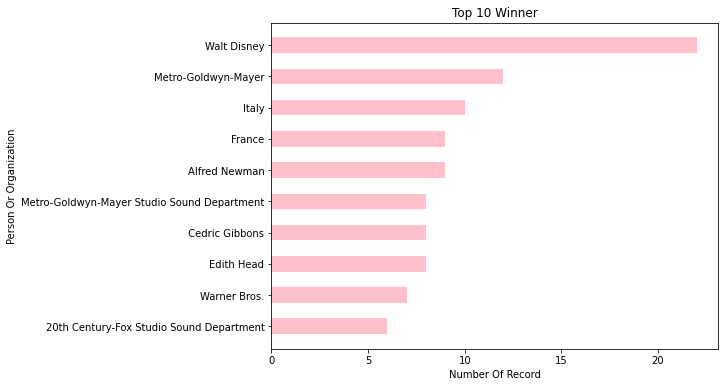

In [ ]:
#Top 10 Winner
topTenAwardsP=nominated_person.sort_values(by='Awards',ascending=False).head(10)
topTenAwardsP=topTenAwardsP.sort_values(by='Awards')
#print(topTenAwardsP)
person_name=topTenAwardsP.index.tolist()

count_award=topTenAwardsP['Awards'].to_list()
figure(figsize=(8, 6))


vis2= plt.barh(person_name,count_award,height=0.5, color = 'pink')
plt.xlabel('Number Of Record')
plt.ylabel('Person Or Organization')
plt.title('Top 10 Winner')
plt.show()